In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
#faire une copie pour les données au cas ou pour back up
data = bitcoin.copy()
# créer une colonne buy et sell et initialiser avec des 0
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [13]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

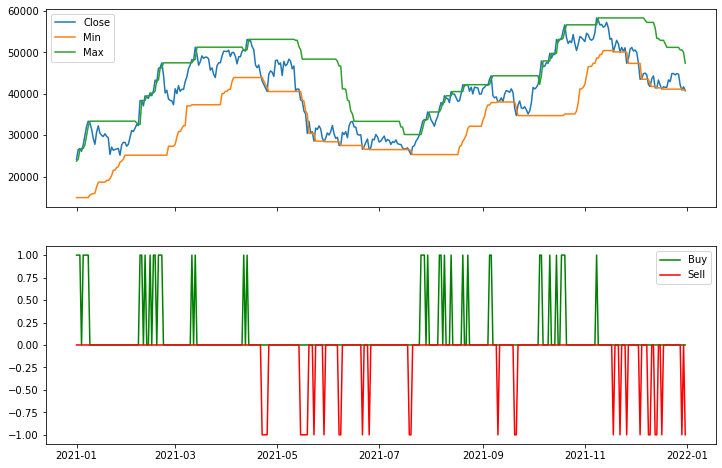

In [14]:
start='2021'
end='2021'
fig, ax=plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
# plt.subplots(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['Close', 'Min', 'Max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy', 'Sell'])